**Prediction of future covid19 cases using Linear Regression and Polynomial Regression**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
dfcovid = pd.read_csv("countries-aggregated_csv.csv")
country = dfcovid[ dfcovid.Country.str.contains("India")]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dfcovid.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
country.head()

,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0


Data Frame showing the rise in covid19 cases in India

In [4]:
X1 = country.iloc[:, 0].values
y = country.iloc[:, 2].values


We use arrays to store values such as Confirmed cases and Date, for making the DataFrame


In [5]:


daily = {'date':X1,'Confirmed':y}
df = pd.DataFrame(daily)


In [6]:
df

,date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
196,2020-08-05,1964536
197,2020-08-06,2027074
198,2020-08-07,2088611
199,2020-08-08,2153010


In [7]:
import plotly.express as px

fig = px.line(df,x= 'date', y='Confirmed',title ='Confirmed cases growth rate')
fig.show()

In [8]:
df['date'] = df['date'].str.replace('-', '')
df['date'] = df['date'].astype(int)



We clean the data to fit it better into our model

In [9]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
y


array([      0,       0,       0,       0,       0,       0,       0,
             0,       1,       1,       1,       2,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       5,       5,
            28,      30,      31,      34,      39,      43,      56,
            62,      73,      82,     102,     113,     119,     142,
           156,     194,     244,     330,     396,     499,     536,
           657,     727,     887,     987,    1024,    1251,    1397,
          1998,    2543,    2567,    3082,    3588,    4778,    5311,
          5916,    6725,    7598,    8446,    9205,   10453,   11487,
         12322,   13430,   14352,   15722,   17615,   18539,   20080,
         21370,   23077,   24530,   26283,   27890,   29451,   31324,
         33062,   34

In [10]:
from sklearn.model_selection import train_test_split 
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




Splitting the data into training and testing samples

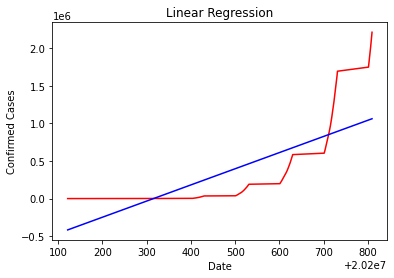

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.plot(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.show()
    return
viz_linear()

**Fitting the curve with Linear Regression Algorithm**

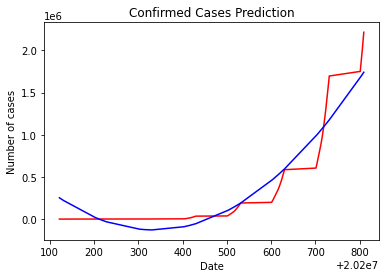

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)



def viz_polymonial():
    plt.plot(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Confirmed Cases Prediction')
    plt.xlabel('Date')
    plt.ylabel('Number of cases')
    plt.show()
    return
viz_polymonial()

**Fitting the curve with Poynomial Regression**

In [13]:
s = int(input())






20202710


In [14]:
print(pol_reg.predict(poly_reg.fit_transform([[s]])))

[46914977.]


**Number of cases predicted based on date as input**


In [16]:
rs = pol_reg.predict(poly_reg.fit_transform(X))
rs


array([ 2.5248650e+05,  2.4892800e+05,  2.4538650e+05,  2.4186100e+05,
        2.3835250e+05,  2.3486100e+05,  2.3138600e+05,  2.2792700e+05,
        2.2448550e+05,  2.2106100e+05,  2.2789000e+04,  2.0549000e+04,
        1.8325000e+04,  1.6118500e+04,  1.3929000e+04,  1.1756000e+04,
        9.6000000e+03,  7.4590000e+03,  5.3365000e+03,  3.2300000e+03,
        1.1405000e+03, -9.3350000e+02, -2.9895000e+03, -5.0290000e+03,
       -7.0515000e+03, -9.0580000e+03, -1.1048000e+04, -1.3021000e+04,
       -1.4977000e+04, -1.6916000e+04, -1.8840000e+04, -2.0745500e+04,
       -2.2635000e+04, -2.4507500e+04, -2.6363500e+04, -2.8203500e+04,
       -3.0026000e+04, -3.1832000e+04, -3.3621000e+04, -1.1859050e+05,
       -1.1916150e+05, -1.1971550e+05, -1.2025350e+05, -1.2077450e+05,
       -1.2127800e+05, -1.2176550e+05, -1.2223600e+05, -1.2269100e+05,
       -1.2312800e+05, -1.2354850e+05, -1.2395250e+05, -1.2434050e+05,
       -1.2471100e+05, -1.2506500e+05, -1.2540200e+05, -1.2572200e+05,
      

In [17]:
xDf  = {'Predict': rs}
fin = pd.DataFrame(xDf)
fin['date'] = X1
xDf

{'Predict': array([ 2.5248650e+05,  2.4892800e+05,  2.4538650e+05,  2.4186100e+05,
         2.3835250e+05,  2.3486100e+05,  2.3138600e+05,  2.2792700e+05,
         2.2448550e+05,  2.2106100e+05,  2.2789000e+04,  2.0549000e+04,
         1.8325000e+04,  1.6118500e+04,  1.3929000e+04,  1.1756000e+04,
         9.6000000e+03,  7.4590000e+03,  5.3365000e+03,  3.2300000e+03,
         1.1405000e+03, -9.3350000e+02, -2.9895000e+03, -5.0290000e+03,
        -7.0515000e+03, -9.0580000e+03, -1.1048000e+04, -1.3021000e+04,
        -1.4977000e+04, -1.6916000e+04, -1.8840000e+04, -2.0745500e+04,
        -2.2635000e+04, -2.4507500e+04, -2.6363500e+04, -2.8203500e+04,
        -3.0026000e+04, -3.1832000e+04, -3.3621000e+04, -1.1859050e+05,
        -1.1916150e+05, -1.1971550e+05, -1.2025350e+05, -1.2077450e+05,
        -1.2127800e+05, -1.2176550e+05, -1.2223600e+05, -1.2269100e+05,
        -1.2312800e+05, -1.2354850e+05, -1.2395250e+05, -1.2434050e+05,
        -1.2471100e+05, -1.2506500e+05, -1.2540200e+0

In [ ]:
fin

,Predict,date
0,252486.5,2020-01-22
1,248928.0,2020-01-23
2,245386.5,2020-01-24
3,241861.0,2020-01-25
4,238352.5,2020-01-26
...,...,...
196,1709245.0,2020-08-05
197,1717086.0,2020-08-06
198,1724944.0,2020-08-07
199,1732818.5,2020-08-08


In [19]:
date = country.iloc[:,0].values
Confirmed =df.iloc[:,1].values
predict = fin.iloc[:,0].values


In [20]:

finald = { 'date' :date ,'Confirmed':Confirmed ,'predicted':predict}
finaldataframe = pd.DataFrame(finald)
finaldataframe

,date,Confirmed,predicted
0,2020-01-22,0,252486.5
1,2020-01-23,0,248928.0
2,2020-01-24,0,245386.5
3,2020-01-25,0,241861.0
4,2020-01-26,0,238352.5
...,...,...,...
196,2020-08-05,1964536,1709245.0
197,2020-08-06,2027074,1717086.0
198,2020-08-07,2088611,1724944.0
199,2020-08-08,2153010,1732818.5


In [22]:
#filtering data 
s=0
n = list(finaldataframe.iloc[:,2].values)
for i in range(len(n)):
  s = s+1
  if n[i]== 9.9358500e+04:
    break
  else:
    n[i] = 0


n


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 99358.5,
 102125.0,
 104909.0,
 107709.5,
 110527.0,
 113360.0,
 116211.0,
 119078.5,
 121962.5,
 124863.5,
 127780.0,
 130714.0,
 133665.0,
 136632.5,
 139616.0,
 142617.0,
 145634.5,
 148669.0,
 151720.0,
 154787.0,
 157871.5,
 160972.5,
 164090.5,
 167225.0,
 170375.0,
 173543.0,
 176727.5,
 179928.5,
 183145.5,
 186380.5,
 189631.5,
 458686.0,
 463122.5,
 467574.5,
 472044.5,
 476530.5,
 481034.0,
 485552.5,
 490089.0,
 494642.5,
 499212.0,
 503798.5,
 508401.0,
 513021.0,
 517657.5,
 522311.0,
 526981.0,
 531666.5,
 536370.0,
 541090.0,
 545827.0,
 550579.5,
 555349.5,
 560136.5,
 564940

We solve underfitting by filtering the data


In [23]:
finaldataframe['predicted'] = n
finaldataframe

,date,Confirmed,predicted
0,2020-01-22,0,0.0
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0
...,...,...,...
196,2020-08-05,1964536,1709245.0
197,2020-08-06,2027074,1717086.0
198,2020-08-07,2088611,1724944.0
199,2020-08-08,2153010,1732818.5


In [24]:
import plotly.express as px
def ploti():

  s = px.line(finaldataframe,x='date', y='predicted',title ='predicted cases growth rate')
  t = px.line(finaldataframe,x ='date',y='Confirmed',title="confirmed ")
  s.show()
  t.show()
ploti()

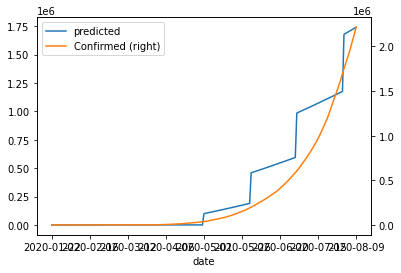

In [25]:
fig, ax = plt.subplots() 
finaldataframe.plot(x = 'date', y = 'predicted', ax = ax) 
finaldataframe.plot(x = 'date', y = 'Confirmed', ax = ax, secondary_y = True) 